In [1]:
import os
import sys
sys.path.append("..")

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from IPython.display import SVG
import rdkit
print(rdkit.__version__)

2020.03.5


In [2]:
def get_blocks(path):
    with open(path, "r") as f:
        line = f.readline()
        while line:
            block = ""
            if line.startswith("@<TRIPOS>MOLECULE"):
                block += line
                line = f.readline()
                while not line.startswith("@<TRIPOS>MOLECULE"):
                    block += line
                    line = f.readline()
                yield(block)

In [3]:
blocks = get_blocks("AAAAHL.xaa.mol2")

In [20]:
while 1:
    b = next(blocks)
    mol2 = Chem.rdmolfiles.MolFromMol2Block(b, removeHs=False)
    if mol2 is None:
        continue
    break

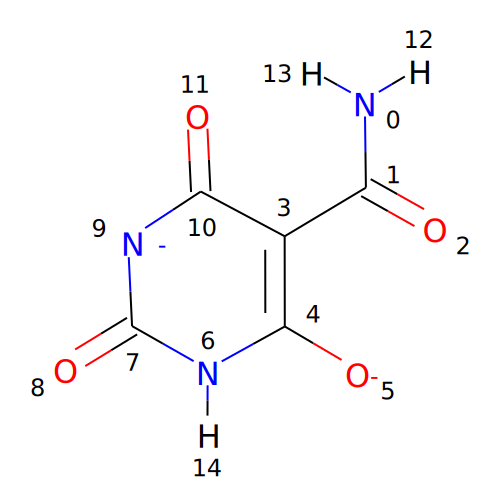

In [29]:
d2d = rdMolDraw2D.MolDraw2DSVG(500, 500)
d2d.drawOptions().addAtomIndices=True
d2d.DrawMolecule(mol2)
d2d.FinishDrawing()
svg_text = d2d.GetDrawingText()
SVG(svg_text)

In [32]:
with open("svg_text.svg", "w") as f:
    f.write(svg_text)

In [22]:
print(Chem.MolToPDBBlock(mol2))

COMPND    ZINC000013957071
HETATM    1  N1  UNL     1      -0.015   1.343   0.018  1.00  0.00           N  
HETATM    2  C1  UNL     1       0.002  -0.004   0.002  1.00  0.00           C  
HETATM    3  O1  UNL     1       1.058  -0.598  -0.111  1.00  0.00           O  
HETATM    4  C2  UNL     1      -1.252  -0.754   0.121  1.00  0.00           C  
HETATM    5  C3  UNL     1      -1.250  -2.147   0.225  1.00  0.00           C  
HETATM    6  O2  UNL     1      -0.090  -2.830   0.219  1.00  0.00           O1-
HETATM    7  N2  UNL     1      -2.440  -2.805   0.334  1.00  0.00           N  
HETATM    8  C4  UNL     1      -3.607  -2.141   0.342  1.00  0.00           C  
HETATM    9  O3  UNL     1      -4.641  -2.772   0.441  1.00  0.00           O  
HETATM   10  N3  UNL     1      -3.671  -0.803   0.245  1.00  0.00           N1-
HETATM   11  C5  UNL     1      -2.546  -0.065   0.139  1.00  0.00           C  
HETATM   12  O4  UNL     1      -2.605   1.148   0.051  1.00  0.00           O  
H

In [23]:
old2new = Chem.CanonicalRankAtoms(mol2, includeChirality=True, breakTies=True)
new2old = {o:i for i, o in enumerate(old2new)}

In [24]:
new_mol = Chem.rdchem.RWMol(Chem.Mol())
for idx in range(len(old2new)):
    new_mol.AddAtom(mol2.GetAtomWithIdx(new2old[idx]))
bonds = mol2.GetBonds()
for b in bonds:
    new_mol.AddBond(old2new[b.GetBeginAtomIdx()], old2new[b.GetEndAtomIdx()], b.GetBondType())

In [25]:
old_conformer = mol2.GetConformer(0)
new_conformer = Chem.Conformer(new_mol.GetNumAtoms())

for idx in range(mol2.GetNumAtoms()):
    pos = old_conformer.GetAtomPosition(new2old[idx])
    new_conformer.SetAtomPosition(idx, pos)

new_mol.AddConformer(new_conformer)

0

In [26]:
con = new_mol.GetConformer(0)
for a in new_mol.GetAtoms():
    print(a.GetIdx(), a.GetSymbol(), list(con.GetAtomPosition(a.GetIdx())))
print()
for b in new_mol.GetBonds():
    print(b.GetBeginAtomIdx(), b.GetEndAtomIdx(), b.GetBondType())

0 H [0.819, 1.8391, 0.0139]
1 H [-0.8609, 1.8178, 0.0289]
2 H [-2.4433, -3.7723, 0.4072]
3 O [1.0583, -0.5981, -0.1107]
4 O [-2.6053, 1.1482, 0.0512]
5 O [-4.6405, -2.7723, 0.441]
6 O [-0.0902, -2.8302, 0.2192]
7 N [-3.6706, -0.8026, 0.2451]
8 C [0.0021, -0.0041, 0.002]
9 C [-1.2517, -0.7543, 0.1206]
10 C [-1.2497, -2.147, 0.2253]
11 C [-2.5463, -0.0646, 0.1391]
12 C [-3.6065, -2.1409, 0.3422]
13 N [-0.0149, 1.3435, 0.0178]
14 N [-2.44, -2.8051, 0.3343]

13 8 SINGLE
13 0 SINGLE
13 1 SINGLE
8 3 DOUBLE
8 9 SINGLE
9 11 AROMATIC
9 10 AROMATIC
10 6 SINGLE
10 14 AROMATIC
14 12 AROMATIC
14 2 SINGLE
12 5 DOUBLE
12 7 AROMATIC
7 11 AROMATIC
11 4 DOUBLE


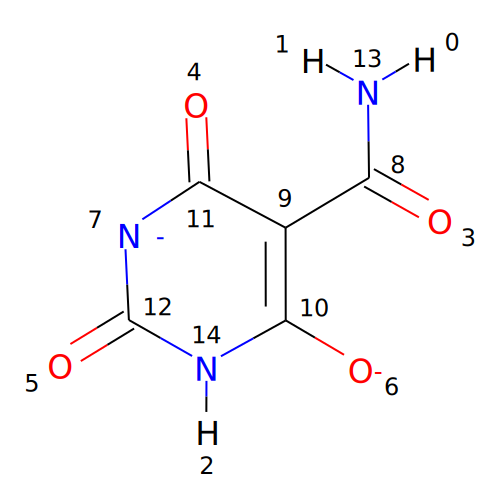

In [27]:
d2d = rdMolDraw2D.MolDraw2DSVG(500, 500)
d2d.drawOptions().addAtomIndices=True
d2d.DrawMolecule(new_mol)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

In [28]:
pdb_block = Chem.MolToPDBBlock(new_mol)
print(pdb_block)

HETATM    1  H1  UNL     1       0.819   1.839   0.014  1.00  0.00           H  
HETATM    2  H2  UNL     1      -0.861   1.818   0.029  1.00  0.00           H  
HETATM    3  H3  UNL     1      -2.443  -3.772   0.407  1.00  0.00           H  
HETATM    4  O1  UNL     1       1.058  -0.598  -0.111  1.00  0.00           O  
HETATM    5  O2  UNL     1      -2.605   1.148   0.051  1.00  0.00           O  
HETATM    6  O3  UNL     1      -4.641  -2.772   0.441  1.00  0.00           O  
HETATM    7  O4  UNL     1      -0.090  -2.830   0.219  1.00  0.00           O1-
HETATM    8  N1  UNL     1      -3.671  -0.803   0.245  1.00  0.00           N1-
HETATM    9  C1  UNL     1       0.002  -0.004   0.002  1.00  0.00           C  
HETATM   10  C2  UNL     1      -1.252  -0.754   0.121  1.00  0.00           C  
HETATM   11  C3  UNL     1      -1.250  -2.147   0.225  1.00  0.00           C  
HETATM   12  C4  UNL     1      -2.546  -0.065   0.139  1.00  0.00           C  
HETATM   13  C5  UNL     1  

In [233]:
mol_from_pdb = Chem.MolFromPDBBlock(pdb_block, removeHs=False)

In [234]:
con = mol_from_pdb.GetConformer(0)
for a in mol_from_pdb.GetAtoms():
    print(a.GetIdx(), a.GetSymbol(), list(con.GetAtomPosition(a.GetIdx())))
print()
for b in mol_from_pdb.GetBonds():
    print(b.GetBeginAtomIdx(), b.GetEndAtomIdx(), b.GetBondType())

0 H [-0.72, -0.2, 0.722]
1 N [-2.48, -4.104, 0.1]
2 C [-0.059, -2.867, 0.141]
3 H [-2.276, -6.618, 0.211]
4 H [-2.116, 1.788, -1.788]
5 O [-3.595, -2.058, -0.021]
6 N [-0.159, -4.21, 0.193]
7 C [-1.35, -4.806, 0.172]
8 C [-2.453, -2.758, 0.051]
9 H [-0.599, -6.695, 0.278]
10 N [-1.415, -6.173, 0.226]
11 H [-1.359, 1.808, -0.288]
12 O [1.144, -2.274, 0.163]
13 N [-1.726, 1.313, -1.038]
14 C [-1.698, -0.034, -1.033]
15 C [-1.222, -2.101, 0.065]
16 O [-2.162, -0.655, -1.97]
17 N [-1.156, -0.694, 0.009]

0 17 SINGLE
1 7 AROMATIC
1 8 AROMATIC
2 6 AROMATIC
2 12 SINGLE
2 15 AROMATIC
3 10 SINGLE
4 13 SINGLE
5 8 DOUBLE
6 7 AROMATIC
7 10 SINGLE
8 15 AROMATIC
9 10 SINGLE
11 13 SINGLE
13 14 SINGLE
14 16 DOUBLE
14 17 SINGLE
15 17 SINGLE


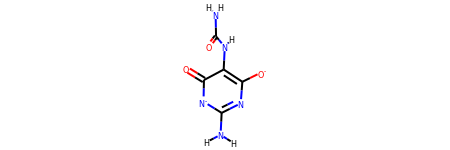

In [235]:
mol_from_pdb

### Below is playground

In [90]:
mol4 = Chem.MolFromMol2Block(open("example2.mol2", "r").read(), removeHs=False)

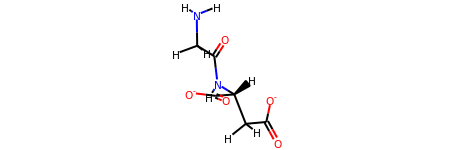

In [91]:
mol4

In [92]:
atoms = mol4.GetAtoms()
for a in atoms:
    print(a.GetIdx(), a.GetSymbol())

0 N
1 C
2 C
3 O
4 N
5 C
6 H
7 C
8 O
9 C
10 O
11 C
12 O
13 O
14 H
15 H
16 H
17 H
18 H
19 H
20 H


In [104]:
list(order)

[16, 18, 13, 8, 17, 20, 7, 19, 11, 14, 9, 15, 12, 10, 0, 1, 3, 4, 2, 5, 6]

In [105]:
conformer = mol4.GetConformer(0)

In [106]:
pos = conformer.GetAtomPosition(6)

In [107]:
pos.x, pos.y, pos.z

(2.5895, -1.6271, 2.685)

In [112]:
a6 = mol4.GetAtomWithIdx(6)

In [113]:
a6.GetSymbol()

'H'

In [110]:
a6.SetAtomMapNum(20)

In [114]:
a6.GetAtomMapNum()

20

In [115]:
a5 = mol4.GetAtomWithIdx(5)

In [116]:
print(a5.GetSymbol())
print(a5.GetAtomMapNum())

C
0


In [152]:
new_mol = Chem.rdchem.RWMol(Chem.Mol())

In [153]:
for idx in order:
    new_mol.AddAtom(mol4.GetAtomWithIdx(idx))

In [154]:
for a in new_mol.GetAtoms():
    print(a.GetIdx(), a.GetSymbol())

0 H
1 H
2 O
3 O
4 H
5 H
6 C
7 H
8 C
9 H
10 C
11 H
12 O
13 O
14 N
15 C
16 O
17 N
18 C
19 C
20 H


In [155]:
bonds = mol4.GetBonds()

In [156]:
for b in bonds:
    new_mol.AddBond(order[b.GetBeginAtomIdx()], order[b.GetEndAtomIdx()], b.GetBondType())

In [157]:
mol5 = Chem.MolFromSmiles(Chem.MolToSmiles(mol4, canonical=True))

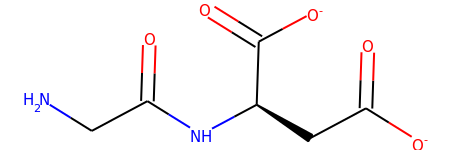

In [158]:
mol5

In [159]:
mol5 = Chem.MolFromMolBlock(Chem.rdmolfiles.MolToMolBlock(new_mol), removeHs=False)

RDKit ERROR: [14:05:01] Explicit valence for atom # 9 H, 2, is greater than permitted


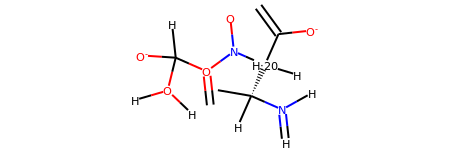

In [160]:
new_mol